# kNN Model Creation for Sales Target Classification

The purpose of the model is a simple implmentation of a k Nearest Neighbours model to predict likelihood of product acceptance, based on customer and call data. Neither feature engineering to improve model fit was considered, nor sampling to improve model balancing.

### Import Packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

### Load Data

In [14]:
data = pd.read_csv('bank_marketing_data.csv', delimiter=';', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target']


### Data Metrics

In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data['target'].value_counts()

no     4000
yes     521
Name: target, dtype: int64

In [5]:
data.groupby('target').mean()

,age,balance,day,duration,campaign,pdays,previous
target,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


### Covert Categories to Numeric

In [15]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=pd.concat([data, cat_list],axis=1)
    data=data1
    
data_vars=data.columns.values.tolist()

### Remove Non-Numeric Categories and Convert y to Numeric

In [17]:
to_keep=[i for i in data_vars if i not in cat_vars]
data_final=data[to_keep]
data_final.loc[:,('target')] = data_final.loc[:,('target')].eq('yes').mul(1)
data_final.columns.values

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'target', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Define X and y Matrices

In [18]:
import statsmodels.api as sm
X = data_final.loc[:, data_final.columns != 'target']
y = data_final.loc[:, data_final.columns == 'target']
y = y.values.ravel()
print(X.head())
print(y)

   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   30     1787   19        79         1     -1         0           0   
1   33     4789   11       220         1    339         4           0   
2   35     1350   16       185         1    330         1           0   
3   30     1476    3       199         4     -1         0           0   
4   59        0    5       226         1     -1         0           0   

   job_blue-collar  job_entrepreneur        ...         month_jun  month_mar  \
0                0                 0        ...                 0          0   
1                0                 0        ...                 0          0   
2                0                 0        ...                 0          0   
3                0                 0        ...                 1          0   
4                1                 0        ...                 0          0   

   month_may  month_nov  month_oct  month_sep  poutcome_failure  \
0          0 

### Normalize Data

In [19]:
# Import module to standardize the scale
from sklearn.preprocessing import StandardScaler
# Create instance (i.e. object) of the standard scaler
scaler = StandardScaler()
scaler.fit(X)

/Users/markmc/.pyenv/versions/fraud_detection/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# Use scaler object to conduct a transforms
scaled_features = scaler.transform(X)

/Users/markmc/.pyenv/versions/fraud_detection/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


In [21]:
X = pd.DataFrame(scaled_features)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-1.056270,0.121072,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
1,-0.772583,1.118644,-0.596026,-0.169194,-0.576829,2.989044,2.041734,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,2.868193,-0.213447,-0.171381,-2.130831
2,-0.583458,-0.024144,0.010273,-0.303898,-0.576829,2.899143,0.270124,-0.343844,-0.514408,-0.196454,...,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,2.868193,-0.213447,-0.171381,-2.130831
3,-1.056270,0.017726,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,-0.343844,-0.514408,-0.196454,...,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300
4,1.686036,-0.472753,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,-0.343844,1.943983,-0.196454,...,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869,-0.348652,-0.213447,-0.171381,0.469300


### Split Training and Test Set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
from sklearn.svm import SVC # "Support vector classifier"

### Optimise

In [29]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

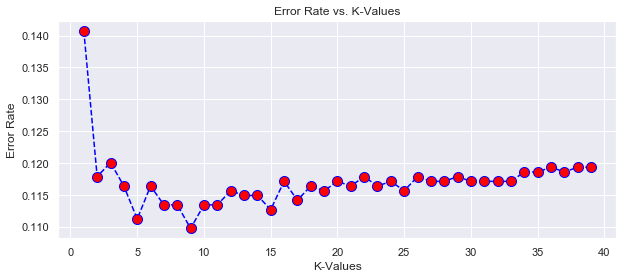

In [30]:
# Configure and plot error rate over k values
plt.figure(figsize=(10,4))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K-Values')
plt.xlabel('K-Values')
plt.ylabel('Error Rate')

### Train kNN Model

Number of neighbours is determined through optimisiation.

In [31]:
# Import module for KNN
from sklearn.neighbors import KNeighborsClassifier
# Create KNN instance
# n_neighbors -> argument identifies the amount of neighbors used to ID classification
knn = KNeighborsClassifier(n_neighbors=9)
# Fit (i.e. traing) the model
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

### Generate Predictions

In [32]:
# Use the .predict() method to make predictions from the X_test subset
y_pred = knn.predict(X_test)

### Precision and Recall on Test Data

In [33]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test, y_pred)

In [34]:
#print(cmat)
print('TP - True Negative {}'.format(cmat[0,0]))
print('FP - False Positive {}'.format(cmat[0,1]))
print('FN - False Negative {}'.format(cmat[1,0]))
print('TP - True Positive {}'.format(cmat[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

TP - True Negative 1180
FP - False Positive 10
FN - False Negative 139
TP - True Positive 28
Accuracy Rate: 0.8901989683124539
Misclassification Rate: 0.10980103168754606


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1190
           1       0.74      0.17      0.27       167

   micro avg       0.89      0.89      0.89      1357
   macro avg       0.82      0.58      0.61      1357
weighted avg       0.88      0.89      0.86      1357



$Precision = \frac{True Positive}{True Positive + False Positive}$      $Recall = \frac{True Positive}{True Positive + False Negative}$

### Conclusion

The original data-set had 4521 targets with 4000 negative and 521 positive.

The test data contained 1357 data points, with 1190 being negative and 167 being positive.
A precision of 74% on test data indicates that the model performs fairly when predicting that a particular customer will accept an offer. The model unfortunately eliminates a high number of potential customers, with a low recall of only 17% on test data.

The model could be improved through feature engineering and SMOTE sampling application to balance the dataset.
Further, an investigation into bais and variance could be conducted.
Lastly, a cross-validation set could be utilised to avoid overfitting and poor generalisation for unseen test data.